# Importing Libraries and Installing TensorFlow

In this project, we will be using several libraries for deep learning and image processing. Let's start by importing the necessary libraries.

In [1]:
# may be needed to install some libraries such as tensorflow and keras
# %pip install tensorflow
# %pip install pydot
# %pip install pydot_ng
# %pip install graphviz

In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, random
import CustomFunctions # custom our functions
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, LSTM, Reshape, Add, Flatten,Dense,Dropout,BatchNormalization, Activation,GlobalAveragePooling2D,Input
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from keras import layers
import cv2

# Data Analysis

In this section, we will perform some analysis on the data. Let's start by loading and exploring the dataset using relevant libraries.

## Dataset Overview

Our dataset was extracted from Kaggle and contains a total of 35,887 images, divided into 28,709 training images and 7,178 test images. The dataset is unbalanced, meaning that the distribution of images among the sentiment classes is not balanced.

The goal of this dataset is to identify the sentiment based on a person's face, which could be useful for improving resources in human resources or other applications.

The dataset consists of images of people's faces, categorized into 7 different sentiment classes:

1. Angry
2. Disgust
3. Fear
4. Happy
5. Neutral
6. Sad
7. Surprise


In [156]:
#train_dir = "../../Data/AAUT2IA/train" #passing the path with training images
#test_dir = "../../Data/AAUT2IA/test"   #passing the path with testing images
train_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA", "train")
test_dir = os.path.join(os.pardir, os.pardir, "Data", "AAUT2IA", "test")


img_size = 48 #original size of the image

Emotions, train_dir_file_count = CustomFunctions.dirInfo(train_dir)

print("This dataset contains on \"" + train_dir + "\" " , train_dir_file_count, " in total")
print(Emotions, "\n\n")

_, test_dir_file_count = CustomFunctions.dirInfo(test_dir)

print("This dataset contains on \"" + test_dir + "\" " , test_dir_file_count, " in total")
print(_)

This dataset contains on "../../Data/AAUT2IA/train"  28709  in total
{'../../Data/AAUT2IA/train/happy': 7215, '../../Data/AAUT2IA/train/sad': 4830, '../../Data/AAUT2IA/train/fear': 4097, '../../Data/AAUT2IA/train/surprise': 3171, '../../Data/AAUT2IA/train/neutral': 4965, '../../Data/AAUT2IA/train/angry': 3995, '../../Data/AAUT2IA/train/disgust': 436} 


This dataset contains on "../../Data/AAUT2IA/test"  7178  in total
{'../../Data/AAUT2IA/test/happy': 1774, '../../Data/AAUT2IA/test/sad': 1247, '../../Data/AAUT2IA/test/fear': 1024, '../../Data/AAUT2IA/test/surprise': 831, '../../Data/AAUT2IA/test/neutral': 1233, '../../Data/AAUT2IA/test/angry': 958, '../../Data/AAUT2IA/test/disgust': 111}


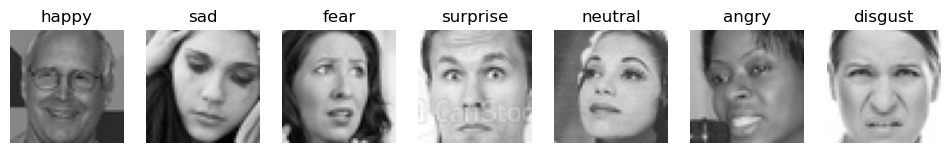

In [157]:
# setting values to rows and column variables
rows = 1
columns = 7
i = 1

# create figure
fig = plt.figure(figsize=(12, 9))

for emotion in Emotions:
    # class path - path to train dir + class name
    #classPath   = train_dir + '/' + emotion
    #print(emotion[25:])
    classPath   = emotion
    
    # gets a random Image from each directory
    randomImage = random.choice(os.listdir(classPath))

    # Adds a subplot at the n position
    fig.add_subplot(rows, columns, i)
    # showing image
    plt.imshow(cv2.imread(classPath + '/' + randomImage))
    plt.axis('off')
    #plt.title(emotion.upper() + " (" + str(Emotions[emotion]) + ")")
    plt.title(emotion[25:])
    i += 1

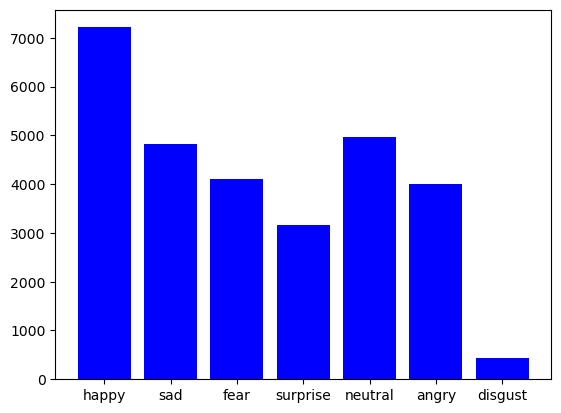

In [158]:
# create distribution plot about the number of images per class
for (emotion, count) in Emotions.items():
    #plt.bar(emotion, count, color='blue')
    plt.bar(emotion[25:], count, color='blue')

dict_values([7215, 4830, 4097, 3171, 4965, 3995, 436])


(-1.10155168422202,
 1.1093416385573491,
 -1.1072832246376072,
 1.1003468202208384)

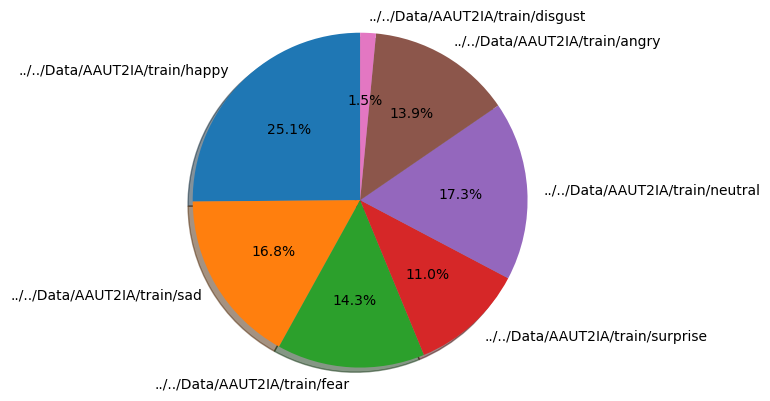

In [159]:
# create pie plot about the number of images per class
print(Emotions.values())
#print(list(Emotions.keys()))
plt.pie(Emotions.values(), labels=list(Emotions.keys()), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Data Augmentation for Class Disgust

As our dataset is unbalanced, we can generate synthetic images for the "Disgust" class using data augmentation techniques to increase the diversity of the data and potentially improve the results.

```python
# Include code for data augmentation on Disgust class here
# Show an example of data augmentation techniques applied to Disgust class images


In [160]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    zoom_range=0.1
)

# create a folder name "AugImages" for the "Disgust" class in the "test" folder
# check if the folder exists
if not os.path.exists('../../Data/AugImages'):
    os.mkdir('../../Data/AugImages')

# iter the images from the folder "train/disgust"
for file in os.listdir('../../Data/AAUT2IA/train/disgust'):
    # load the image
    img = keras.utils.image_utils.load_img('../../Data/AAUT2IA/train/disgust/' + file, color_mode="grayscale", target_size=(img_size, img_size))
    # convert the image to array
    x = keras.utils.image_utils.img_to_array(img)
    # reshape the image
    x = x.reshape((1,) + x.shape)

    # generate the augmented images
    num = 0
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir='../../Data/AugImages/', save_prefix='aug',save_format='jpeg'):
        i += 1
        if i > 10:
            break  # Stop after generating 10 augmented images

    
# counts the number of images in the folder "AugImages"
print("Number of images in the folder \"AugImages\": ", len(os.listdir('../../Data/AugImages')))

# count the number of images in the folder "train/disgust"
print("Number of images in the folder \"train/disgust\": ", len(os.listdir('../../Data/AAUT2IA/train/disgust')))

Number of images in the folder "AugImages":  9067
Number of images in the folder "train/disgust":  436


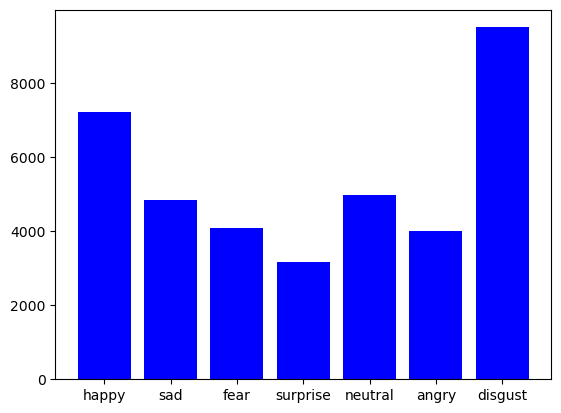

In [161]:
# Add to class disgust the number of images in the folder "AugImages"
Emotions['../../Data/AAUT2IA/train/disgust'] = Emotions['../../Data/AAUT2IA/train/disgust'] + len(os.listdir('../../Data/AugImages'))
#Emotions['disgust'] = Emotions['disgust'] + len(os.listdir('../../Data/AugImages'))

# plots the distribution of the number of images per class in a bar plot
for (emotion, count) in Emotions.items():
    #plt.bar(emotion, count, color='blue')
    plt.bar(emotion[25:], count, color='blue')

(-1.103923228913245,
 1.1014948922688592,
 -1.1039062430311075,
 1.1001860115729098)

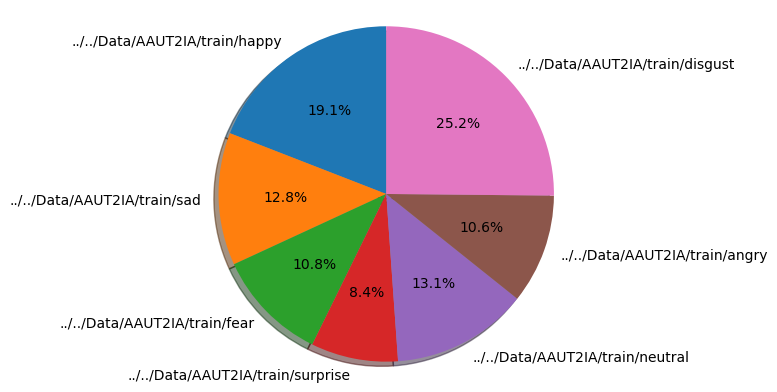

In [162]:
# create pie char about the number of images per class
plt.pie(Emotions.values(), labels=Emotions.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Undersampling

In this chapter, We've implemented techniques to address the class imbalance issue in the dataset. Two techniques were used:

1. Removal of the "Disgust" class from the dataset.
2. Creation of a balanced dataset where each class contains the same number of images by undersampling the majority classes.

In [163]:
import shutil

# if AAUT2IA_Copy folder exists, delete it
if os.path.exists('../../Data/AAUT2IA_Copy'):
    shutil.rmtree('../../Data/AAUT2IA_Copy')
    
# Define the source and destination paths
source_path = "../../Data/AAUT2IA"
destination_path = "../../Data/AAUT2IA_Copy"

# Use shutil to duplicate the folder
shutil.copytree(source_path, destination_path)

print("Folder duplicated successfully!")

Folder duplicated successfully!


In [164]:
# if AAUT2IA_Copy contains disgust in train and test delete it
if os.path.exists('../../Data/AAUT2IA_Copy/train/disgust'):
    shutil.rmtree('../../Data/AAUT2IA_Copy/train/disgust')

if os.path.exists('../../Data/AAUT2IA_Copy/test/disgust'):
    shutil.rmtree('../../Data/AAUT2IA_Copy/test/disgust')

The folder whit least images contains :  3171  images


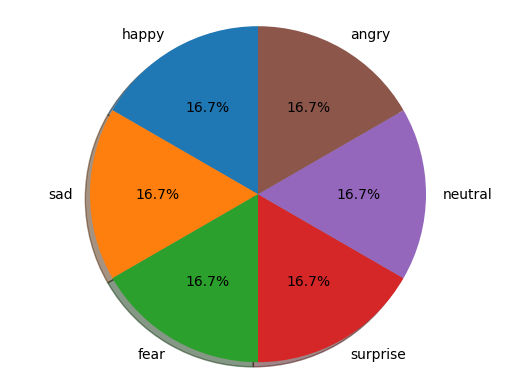

In [170]:
# Disgut class was removed from one dataset "AAUT2IA_Test"
# we will nevel use this to test the model
# remove extra files from the dataset

train_dir_teste = "../../Data/AAUT2IA_Copy/train"
test_dir_teste =  "../../Data/AAUT2IA_Copy/test"

# counts whit of the subfolders from train_dir contains the least amount of files
min_count = 0
for folder in os.listdir(train_dir_teste):
    if os.path.isdir(os.path.join(train_dir_teste, folder)):
        count = len(os.listdir(os.path.join(train_dir_teste, folder)))
    else:
        continue
    if min_count == 0:
        min_count = count
    elif count < min_count:
        min_count = count

print("The folder whit least images contains : ", min_count , " images")

# removes a random number of files from each subfolder from train_dir to match the min_count
for folder in os.listdir(train_dir_teste):
    if os.path.isdir(os.path.join(train_dir_teste, folder)):
        files = os.listdir(os.path.join(train_dir_teste, folder))
        random.shuffle(files)
        for file in files[min_count:]:
            os.remove(os.path.join(train_dir_teste, folder, file))
    else:
        continue

# plot pie chart with the number of files in each subfolder
labels = []
sizes = []
for folder in os.listdir(train_dir_teste):
    if os.path.isdir(os.path.join(train_dir_teste, folder)):
        count = len(os.listdir(os.path.join(train_dir_teste, folder)))
        labels.append(folder)
        sizes.append(count)
    else:
        continue

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Model Blocks

During the training process, several model blocks were used to experiment and determine the best fit for our dataset. The following model blocks were used:

1. `conv_block`: A custom convolutional block implemented in the code.
2. `VGG16`: The VGG16 model architecture, a popular convolutional neural network (CNN) architecture for image classification.
3. `my_cnn_model`: A custom CNN model implemented in the code.
4. `model_block (resnet)`: A model block based on the ResNet architecture, a deep CNN architecture known for its skip connections.
5. `model_block (resnet without shortcut)`: A variant of the ResNet architecture without skip connections.



In [171]:
# Model Blocks for Deep Learning Models
def conv_block(input_layer, filters, kernel_size, strides, padding, activation, kernel_regularizer, name):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding, kernel_regularizer=kernel_regularizer, name=name)(input_layer)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

def vgg16_like(input_layer):
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    return x

def my_cnn_model(input_shape, num_classes):
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 2
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 3
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 4
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 5
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Block 6
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Flatten and fully-connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def model_block(x, filters, strides=1, activation='relu'):
    # Block of layers used twice in ResNet50
    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)

    return x

def resnet_block(x, filters, strides=1, activation='relu'):
    # Shortcut path
    shortcut = x
    shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
    shortcut = BatchNormalization()(shortcut)
    
    # Main path
    x = Conv2D(filters, kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Add shortcut and main path
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x

# Building the Model

In this step, We utilized the Keras library to build a convolutional neural network (CNN) model for sentiment analysis on our face image dataset. The dataset was loaded using the `ImageDataGenerator` and `flow_from_directory` functions in Keras, which allowed us to efficiently load and augment the images for training.

To address the class imbalance issue, we tried undersampling and oversampling techniques. However, after experimentation, these techniques did not yield the desired results in terms of improving the model's performance.

The CNN model was designed with multiple convolutional and pooling layers followed by fully connected layers to learn relevant features from the images. The architecture of the model was carefully selected based on experimentation and domain knowledge.

After training the model, it was saved in a variable if we want to do for further evaluation or even use the model in real world examples. Several tests were conducted to assess the model's performance, and the average accuracy achieved was around 68% on the testing data (We only have training and testing data). Although this accuracy is reasonable, further improvements and optimizations could be explored to enhance the model's performance.

The implementation and training of the CNN model were crucial steps in our project to achieve the goal of sentiment analysis on face images. It involved careful selection of hyperparameters, model architecture, and evaluation of the model's performance. The process was iterative and involved experimentation to achieve the best possible results.

In [172]:
# Define some hyperparameters
img_height = img_width = img_size = 48
batch_size = 32
epochs = 50

train_dir = "../../Data/AAUT2IA/train" #passing the path with training images
test_dir = "../../Data/AAUT2IA/test"   #passing the path with testing images


train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [173]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1), kernel_regularizer=regularizers.L1(0.01)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.01)))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.01)))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.01)))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.01)))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.01)))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

model.summary()

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define the callback

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, earlystop, reduce_lr]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_15 (Bat  (None, 44, 44, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                      

# Evaluating the Model

To evaluate the performance of our trained CNN model for sentiment analysis, we used several visualization techniques, including:

1. **History Plot**: We plotted the model loss and accuracy over epochs using the `history` object generated during training. This plot provided insights into how well the model was learning from the training data and whether it was overfitting or underfitting.

2. **Confusion Matrix**: We generated a confusion matrix to visualize the model's performance in predicting different sentiment classes. The confusion matrix helped us understand the model's accuracy and misclassification patterns for each sentiment category.

These evaluation techniques were crucial in assessing the performance of our CNN model and making informed decisions on model improvements and optimizations.

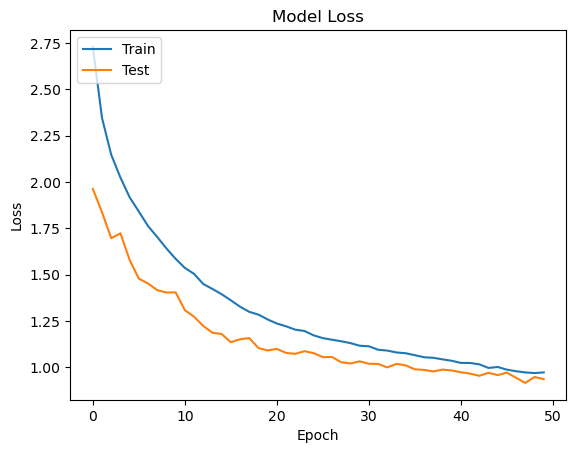

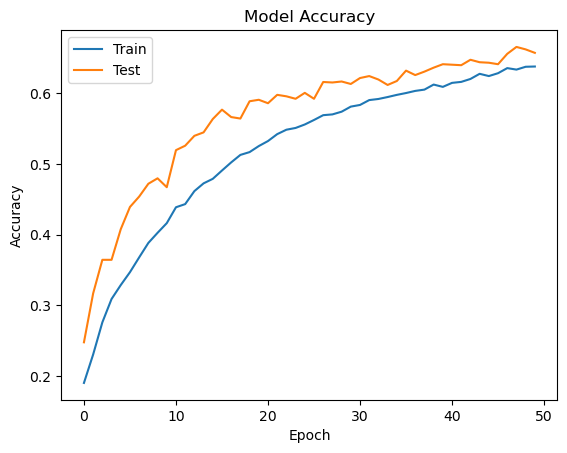

In [174]:
# plot model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

23/23 [==============================] - 3s 116ms/step


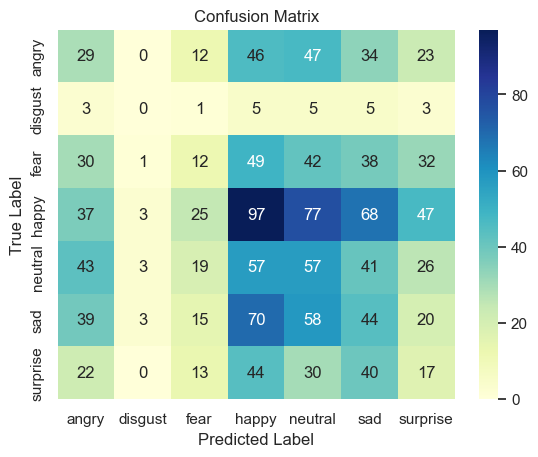

In [175]:
import seaborn as sns

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Testing the Model with Random Images

We tested our trained CNN model on some random images to assess its performance. We plotted the input images and their corresponding predicted sentiment outputs to visually inspect the model's predictions.

NotADirectoryError: [Errno 20] Not a directory: '../../Data/AAUT2IA/test/.DS_Store'

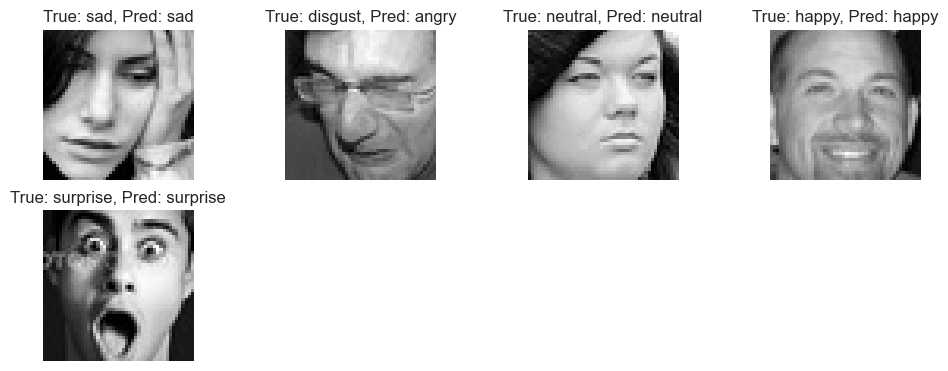

In [189]:
# setting values to rows and column variables
rows = 4
columns = 4
i = 1

# create figure
fig = plt.figure(figsize=(12, 9))

# get 16 random images from "AAUT2IA" test folder
for i in range(1, 17):
    random_class = random.choice(os.listdir(test_dir))
    random_img = random.choice(os.listdir(test_dir + '/' + random_class))
    img = cv2.imread(test_dir + '/' + random_class + '/' + random_img, cv2.IMREAD_GRAYSCALE)

    # make predictions on the random image
    ori_img = img
    img = img.reshape(1, 48, 48, 1)
    img = img / 255.0
    pred = model.predict(img.reshape(1, 48, 48, 1), verbose=0)
    pred = np.argmax(pred, axis=1)

    # plot the image
    fig.add_subplot(rows, columns, i)
    plt.imshow(ori_img, cmap='gray')
    plt.title(f"True: {random_class}, Pred: {class_names[pred[0]]}")
    plt.axis('off')
    i += 1

